## 範例重點

* 了解如何重置 Tensorflow Graph
* 學習如何以迴圈方式繪圖
* 學習如何以迴圈方式訓練不同超參數的模型

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import backend
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import SGD
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.


## 準備資料

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
def normalize_cifar10_data(x, y):
    x = x.reshape((len(x), -1)) / 255.
    y = np_utils.to_categorical(y, num_classes=10)
    return x, y

def normalize_result(x, y):
    print('x.shape:', x.shape)
    print('y.shape:', y.shape)

In [4]:
print('Before normalization:')
normalize_result(X_train, y_train)

Before normalization:
x.shape: (50000, 32, 32, 3)
y.shape: (50000, 1)


In [5]:
print('After normalization:')
X_train, y_train = normalize_cifar10_data(X_train, y_train)
X_test, y_test = normalize_cifar10_data(X_test, y_test)
normalize_result(X_train, y_train)

After normalization:
x.shape: (50000, 3072)
y.shape: (50000, 10)


## 定義函數

In [6]:
def train_models(X_train, y_train, X_test, y_test, epochs, batch_size, momentum, learning_rates=()):
    train_histories = []
    for i, learning_rate in enumerate(learning_rates):
        print('Experiment with learning rate: {:.6f}'.format(learning_rate))
        backend.clear_session() # 清掉舊的 Graph
        model = build_model(X_train, (X_train.shape[-1],), 10, neuron_numbers=(512, 256, 128,))
        model.summary()
        model.compile(optimizer=SGD(lr=learning_rate, momentum=momentum, nesterov=True),
                      loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test,),
                  shuffle=True, verbose=2)
        train_histories.append(model.history)
    return train_histories

def build_model(x, input_shape, output_units, neuron_numbers=()):
    main_input, hidden_layer = Input(shape=input_shape, name='main_input'), None
    for i, neuron_number in enumerate(neuron_numbers):
        dense_layer = Dense(units=neuron_number, activation='relu', name=f'hidden_layer{i}')
        hidden_layer = dense_layer(hidden_layer) if hidden_layer is not None else dense_layer(main_input)
    main_output = Dense(units=output_units, activation='softmax', name='main_output')(hidden_layer)
    return Model(inputs=[main_input], outputs=[main_output])

def show_train_histories(train_histories, train_name, val_name, colors, learning_rates):
    plt.figure(figsize=(8, 6,))
    for i, train_history in enumerate(train_histories):
        show_train_history(train_history, train_name, val_name, colors[i], learning_rates[i])
    plt.xlabel('Epoch')
    plt.ylabel(train_name)
    plt.title('Train History')
    plt.legend()
    plt.show()

def show_train_history(train_history, train_name, val_name, color, learning_rate):
    plt.plot(train_history.history[train_name], '-', label='exp-lr-{:.1E}'.format(learning_rate), color=color)
    plt.plot(train_history.history[val_name], '--', label='exp-lr-{:.1E}'.format(learning_rate), color=color)

## 訓練模型

In [7]:
## 設定超參數
epochs = 50
momentum = 0.95
batch_size = 256
learning_rates = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]

## 設定繪圖參數
colors = ['r', 'g', 'b', 'y', 'm']

In [8]:
train_histories = train_models(X_train, y_train, X_test, y_test, epochs, batch_size, momentum, learning_rates=learning_rates)

Experiment with learning rate: 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
main_output (Dense)          (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 12s - loss: 2.0374 - acc: 0.

Epoch 22/50
 - 11s - loss: 0.9167 - acc: 0.6736 - val_loss: 1.4099 - val_acc: 0.5242
Epoch 23/50
 - 11s - loss: 0.8969 - acc: 0.6809 - val_loss: 1.5152 - val_acc: 0.5038
Epoch 24/50
 - 11s - loss: 0.8681 - acc: 0.6905 - val_loss: 1.4798 - val_acc: 0.5295
Epoch 25/50
 - 11s - loss: 0.8347 - acc: 0.7042 - val_loss: 1.4752 - val_acc: 0.5244
Epoch 26/50
 - 11s - loss: 0.8191 - acc: 0.7073 - val_loss: 1.4310 - val_acc: 0.5326
Epoch 27/50
 - 11s - loss: 0.7909 - acc: 0.7184 - val_loss: 1.4948 - val_acc: 0.5330
Epoch 28/50
 - 11s - loss: 0.7673 - acc: 0.7258 - val_loss: 1.4829 - val_acc: 0.5391
Epoch 29/50
 - 11s - loss: 0.7384 - acc: 0.7380 - val_loss: 1.5437 - val_acc: 0.5308
Epoch 30/50
 - 11s - loss: 0.7208 - acc: 0.7422 - val_loss: 1.5458 - val_acc: 0.5268
Epoch 31/50
 - 11s - loss: 0.6959 - acc: 0.7516 - val_loss: 1.6266 - val_acc: 0.5269
Epoch 32/50
 - 11s - loss: 0.6727 - acc: 0.7594 - val_loss: 1.7495 - val_acc: 0.5098
Epoch 33/50
 - 11s - loss: 0.6518 - acc: 0.7669 - val_loss: 1.671

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 12s - loss: 2.2192 - acc: 0.1906 - val_loss: 2.1439 - val_acc: 0.2482
Epoch 2/50
 - 11s - loss: 2.0973 - acc: 0.2642 - val_loss: 2.0586 - val_acc: 0.2762
Epoch 3/50
 - 11s - loss: 2.0253 - acc: 0.2907 - val_loss: 1.9977 - val_acc: 0.2967
Epoch 4/50
 - 11s - loss: 1.9724 - acc: 0.3112 - val_loss: 1.9529 - val_acc: 0.3181
Epoch 5/50
 - 11s - loss: 1.9329 - acc: 0.3266 - val_loss: 1.9192 - val_acc: 0.3284
Epoch 6/50
 - 11s - loss: 1.9024 - acc: 0.3353 - val_loss: 1.8915 - val_acc: 0.3379
Epoch 7/50
 - 11s - loss: 1.8771 - acc: 0.3432 - val_loss: 1.8704 - val_acc: 0.3514
Epoch 8/50
 - 11s - loss: 1.8564 - acc: 0.3512 - val_loss: 1.8512 - val_acc: 0.3518
Epoch 9/50
 - 12s - loss: 1.8382 - acc: 0.3585 - val_loss: 1.8363 - val_acc: 0.3619
Epoch 10/50
 - 11s - loss: 1.8223 - acc: 0.3641 - val_loss: 1.8221 - val_acc: 0.3700
Epoch 11/50
 - 11s - loss: 1.8080 - acc: 0.3701 - val_loss: 1.8068 - val_acc: 0.3710
Epoch 12/50
 - 11s - los

Epoch 35/50
 - 11s - loss: 1.9563 - acc: 0.3191 - val_loss: 1.9538 - val_acc: 0.3172
Epoch 36/50
 - 11s - loss: 1.9519 - acc: 0.3217 - val_loss: 1.9496 - val_acc: 0.3163
Epoch 37/50
 - 11s - loss: 1.9477 - acc: 0.3231 - val_loss: 1.9455 - val_acc: 0.3191
Epoch 38/50
 - 11s - loss: 1.9436 - acc: 0.3245 - val_loss: 1.9416 - val_acc: 0.3203
Epoch 39/50
 - 11s - loss: 1.9396 - acc: 0.3248 - val_loss: 1.9377 - val_acc: 0.3220
Epoch 40/50
 - 11s - loss: 1.9358 - acc: 0.3281 - val_loss: 1.9341 - val_acc: 0.3223
Epoch 41/50
 - 11s - loss: 1.9320 - acc: 0.3283 - val_loss: 1.9305 - val_acc: 0.3235
Epoch 42/50
 - 11s - loss: 1.9283 - acc: 0.3299 - val_loss: 1.9269 - val_acc: 0.3266
Epoch 43/50
 - 11s - loss: 1.9249 - acc: 0.3311 - val_loss: 1.9235 - val_acc: 0.3265
Epoch 44/50
 - 11s - loss: 1.9215 - acc: 0.3314 - val_loss: 1.9203 - val_acc: 0.3268
Epoch 45/50
 - 11s - loss: 1.9181 - acc: 0.3332 - val_loss: 1.9173 - val_acc: 0.3273
Epoch 46/50
 - 11s - loss: 1.9149 - acc: 0.3345 - val_loss: 1.914

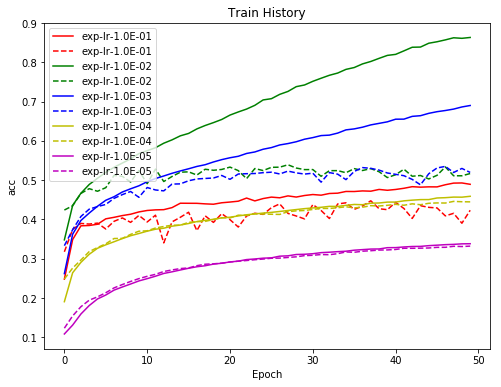

In [9]:
show_train_histories(train_histories, 'acc', 'val_acc', colors, learning_rates)

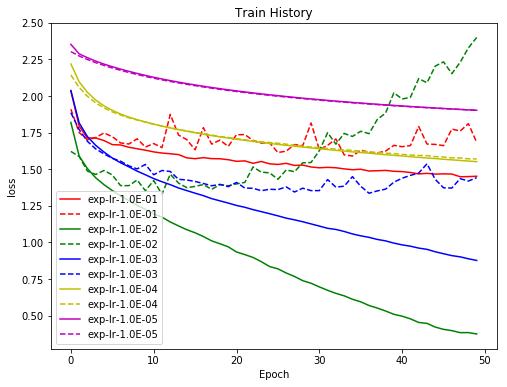

In [10]:
show_train_histories(train_histories, 'loss', 'val_loss', colors, learning_rates)

## 作業

請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現